In [1]:
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Load
using .SlcUtil
using Dates
using JLD

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


In [2]:
function _sort_jld_files(file_list,date_position )
    name_list = [split(elem,".")[1] for elem in file_list]
    date_string = [split(elem,"_")[date_position] for elem in name_list]
    date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
    return file_list[sortperm(date)][end:-1:1]
end

function _sort_prossed_files(data_folder,sort_master = true)
    files = readdir(data_folder)

    files = [elem for elem in files if length(elem)>1]
    files = [elem for elem in files if length(split(elem,"_"))>3]

    coherence_idx = [split(elem,"_")[2]=="coh" for elem in files]
    coherence_files = files[coherence_idx ]  
    if sort_master 
        coherence_files = _sort_jld_files(coherence_files,6)
    else
        _sort_jld_files(coherence_files,8)
    end

    coherence_VV_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VV"]
    coherence_VH_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VH"]                    

    VV_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VV") for elem in files];
    VV_files = files[VV_idx] 
    VV_files = _sort_jld_files(VV_files,4)

    VH_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VH") for elem in files];
    VH_files= files[VH_idx];                 
    VH_files = _sort_jld_files(VH_files,4)
                                                
    return VV_files,VH_files,coherence_VV_files,coherence_VH_files 
end
                                                
function _load_jld(file_list,data_folder)
    path_names = [joinpath(data_folder,elem) for elem in file_list]
    return [JLD.load(elem,"data") for elem in path_names]
end

_load_jld (generic function with 1 method)

In [3]:
figure_folder = "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe_png"
data_folder = "/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe"

"/Users/eyu/Google Drive/DTU/10_semester/Persistent_scaterer/coherence6_fixed_poe"

In [17]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
coh = _load_jld(coherence_VV_files, data_folder);
#VH = _load_jld(VH_files,data_folder);
#VV = [elem[:,end:-1:1] for elem in VV];
#VH = [elem[:,end:-1:1] for elem in VH];

In [24]:
coherence_VV_files

29-element Array{String,1}:
 "6d_coh_AB_VV_M_20170824_S_20170830.jld" 
 "6d_coh_BA_VV_M_20170818_S_20170824.jld" 
 "6d_coh_AB_VV_M_20170812_S_20170818.jld" 
 "6d_coh_BA_VV_M_20170806_S_20170812.jld" 
 "6d_coh_AB_VV_M_20170731_S_20170806.jld" 
 "6d_coh_BA_VV_M_20170725_S_20170731.jld" 
 "6d_coh_AB_VV_M_20170719_S_20170725.jld" 
 "6d_coh_BA_VV_M_20170713_S_20170719.jld" 
 "12d_coh_BB_VV_M_20170701_S_20170713.jld"
 "6d_coh_AB_VV_M_20170625_S_20170701.jld" 
 "6d_coh_BA_VV_M_20170619_S_20170625.jld" 
 "6d_coh_AB_VV_M_20170613_S_20170619.jld" 
 "6d_coh_BA_VV_M_20170607_S_20170613.jld" 
 ⋮                                        
 "6d_coh_AB_VV_M_20170508_S_20170514.jld" 
 "6d_coh_BA_VV_M_20170502_S_20170508.jld" 
 "6d_coh_AB_VV_M_20170426_S_20170502.jld" 
 "6d_coh_BA_VV_M_20170420_S_20170426.jld" 
 "6d_coh_AB_VV_M_20170414_S_20170420.jld" 
 "6d_coh_BA_VV_M_20170408_S_20170414.jld" 
 "6d_coh_AB_VV_M_20170402_S_20170408.jld" 
 "6d_coh_BA_VV_M_20170327_S_20170402.jld" 
 "6d_coh_AB_VV_M_20170321_

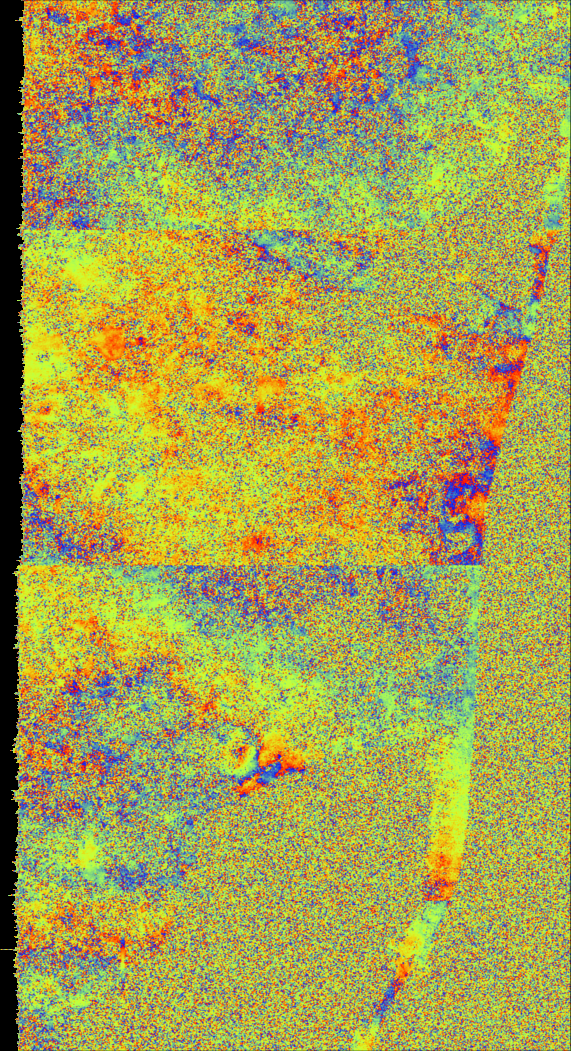

In [26]:
phase_img = SlcUtil.plot_phase(coh[10])

# subset 

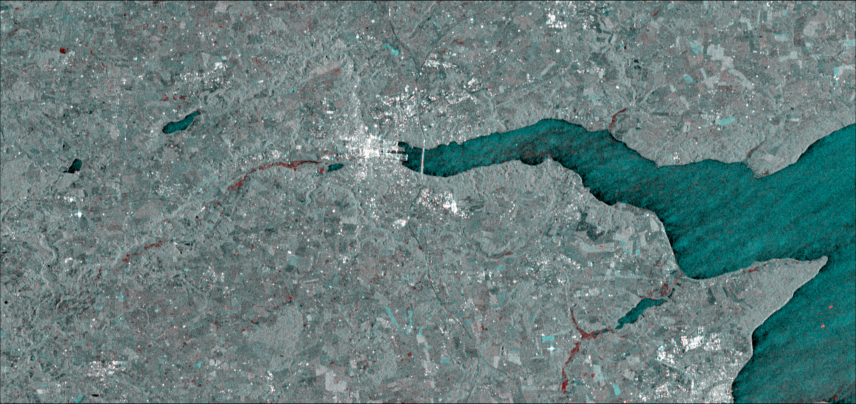

In [23]:
img = pretty_img([VV[1], VV[4]], min_vv, max_vv)

In [24]:
size(img)

(806, 1711)

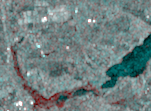

In [25]:
subset = [570:680,1130:1280]
img[subset...]

# Filter pre 

In [8]:
VV_pre_filt = SlcUtil.temporal_filter(VV[2:end],5);

In [9]:
i = 4

4

In [10]:
pre_raw = VV[i+1][subset...];
pre_filt=VV_pre_filt[i][subset...];

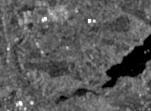

In [12]:
img = Colors.Gray.(db_scale_img(pre_raw,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_no_temporal_pre.png")
FileIO.save(file_path,img)
img

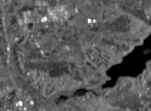

In [13]:
img = Colors.Gray.(db_scale_img(pre_filt,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_temporal_pre.png")
FileIO.save(file_path,img)
img

In [14]:
y_raw, w_raw = histogram(10 .* log10.(reshape(pre_raw,:)),100);
y_filt, w_filt = histogram(10 .* log10.(reshape(pre_filt,:)),100);

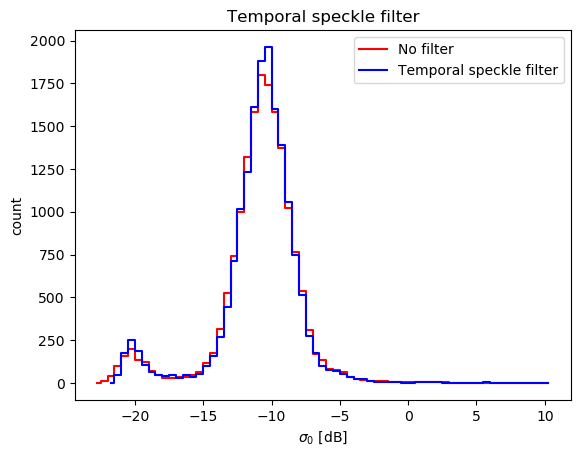

In [25]:

file_path = joinpath(figure_folder,"hist_temporal_pre.png")
PyPlot.figure()
PyPlot.step(y_raw, w_raw,color="r",where="mid")
PyPlot.step(y_filt, w_filt,color="b",where="mid")
PyPlot.legend(["No filter","Temporal speckle filter"])
PyPlot.title("Temporal speckle filter")
PyPlot.xlabel("\$\\sigma_0 \$ [dB]")
PyPlot.ylabel("count")
PyPlot.savefig(file_path)

# Filter co VV and VH


In [27]:
VV_co_filt,VH_co_filt = SlcUtil.temporal_filter([VV[1],VH[1]],5);
VV_co_all = SlcUtil.temporal_filter(VV,5);
VV_co_all = VV_co_all[1];

In [28]:
co_raw = VV[1][subset...]
co_filt = VV_co_filt[subset...];
co_all = VV_co_all[subset...];

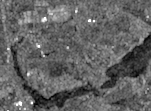

In [29]:
img = Colors.Gray.(db_scale_img(co_raw,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_no_temporal_co.png")
FileIO.save(file_path,img)
img

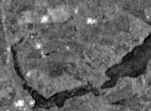

In [30]:
img = Colors.Gray.(db_scale_img(co_filt,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_pols_temporal_co.png")
FileIO.save(file_path,img)
img

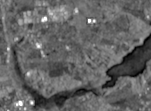

In [31]:
img= Colors.Gray.(db_scale_img(co_all,min_vv,max_vv))
file_path = joinpath(figure_folder,"small_all_temporal_co.png")
FileIO.save(file_path,img)
img

In [32]:
y_raw, w_raw = histogram(10 .* log10.(reshape(co_raw,:)),100);
y_filt, w_filt = histogram(10 .* log10.(reshape(co_filt,:)),100);
y_all, w_all = histogram(10 .* log10.(reshape(co_all,:)),100);

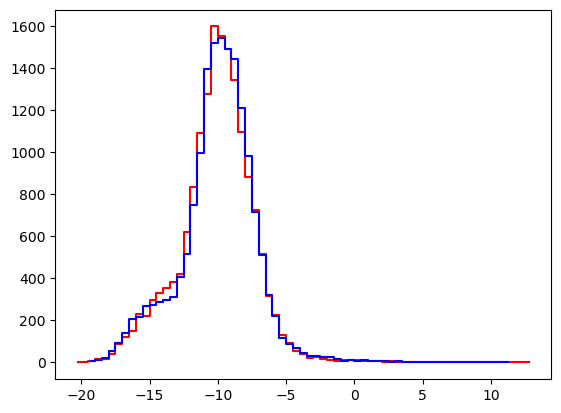

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14ea4ca58>

In [33]:
# Histo gram of go pol

PyPlot.figure()
PyPlot.step(y_raw, w_raw,color="r",where="mid")
PyPlot.step(y_filt, w_filt,color="b",where="mid")